*Imports*

In [89]:
import numpy as np
import pandas as pd
import sklearn as sl
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error as mae
# from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt

*Data Reading*

In [154]:
data_df = pd.read_csv("data.csv")
data_df.head()

,Id,LotFrontage,LotArea,YearBuilt,BedroomAbvGr,KitchenAbvGr,YrSold,SalePrice
0,1,65,8450,2003,3,1,2008,208500
1,2,80,9600,1976,3,1,2007,181500
2,3,68,11250,2001,3,1,2008,223500
3,4,60,9550,1915,3,1,2006,140000
4,5,84,14260,2000,4,1,2008,250000


**Part *A*:**

In [155]:
shuffled_data = data_df.sample(frac=1, random_state=0)
shuffled_data.head()

,Id,LotFrontage,LotArea,YearBuilt,BedroomAbvGr,KitchenAbvGr,YrSold,SalePrice
198,199,63,5000,1900,3,1,2006,79000
328,329,38,14963,1996,1,1,2008,245500
45,46,60,7134,1955,3,1,2007,130000
263,264,94,13005,1980,4,1,2009,260000
621,622,59,10593,1996,3,1,2010,260400


In [43]:
feathers = ['LotFrontage', 'LotArea', 'YearBuilt', 'BedroomAbvGr', 'KitchenAbvGr', 'YrSold']
target = ['SalePrice']

In [157]:
x, y = np.asarray(shuffled_data[feathers]), np.asarray(shuffled_data[target]).reshape(-1, 1)
print(x.shape)
print(y.shape)

(1200, 6)
(1200, 1)


In [45]:
x_test, y_test = x[:600], y[:600]
x_train, y_train = x[600:], y[600:]

In [156]:
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')
print()
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

x_test shape: (600, 6)
y_test shape: (600, 1)

x_train shape: (600, 6)
y_train shape: (600, 1)


**Part *B*:**

In [78]:
regressor = linear_model.LinearRegression()
# regs_Model = regressor.fit(x_train[:20], y_train[:20])
# print(regs_Model.coef_)
# print(regs_Model.intercept_)

In [83]:
regs_Model = regressor.fit(x_train[:20], y_train[:20])

y_pred = regs_Model.predict(x_train[:20])
print("Mean Absolute Error for Train Data: ", round(mae(y_train[:20], y_pred), 2))

y_pred = regs_Model.predict(x_test[:20])
print("Mean Absolute Error for Test Data: ", round(mae(y_test[:20], y_pred), 2))

Mean Absolute Error for Train Data:  43655.49
Mean Absolute Error for Test Data:  38910.63


**Part *C*:**

In [130]:
trainData_MAEs = []
testData_MAEs = []
P_Values = []
n_samples = []

In [131]:
for i in range(1, (100//20)+1):
    regs_Model = regressor.fit(x_train[:i*20], y_train[:i*20])

    y_pred_train = regs_Model.predict(x_train[:i*20])
    trainData_MAEs.append(round(mae(y_train[:i*20], y_pred_train), 2))

    y_pred_test = regs_Model.predict(x_test[:i*20])
    testData_MAEs.append(round(mae(y_test[:i*20], y_pred_test), 2))

    n_samples.append(i*20)

In [132]:
for i in range(2, (600//100)+1):
    regs_Model = regressor.fit(x_train[:i*100], y_train[:i*100])

    y_pred_train = regs_Model.predict(x_train[:i*100])
    trainData_MAEs.append(round(mae(y_train[:i*100], y_pred_train), 2))

    y_pred_test = regs_Model.predict(x_test[:i*100])
    testData_MAEs.append(round(mae(y_test[:i*100], y_pred_test), 2))

    n_samples.append(i*100)

In [133]:
print(trainData_MAEs)
print(testData_MAEs)
print(P_Values)
print(n_samples)

len(trainData_MAEs) == len(testData_MAEs) == len(n_samples)

[43655.49, 41214.05, 39462.96, 39835.75, 43305.32, 43322.85, 43465.21, 43284.68, 42211.21, 41983.52]
[38910.63, 31333.37, 35805.56, 37010.4, 39165.77, 39952.29, 42080.8, 47043.68, 46783.71, 44398.82]
[]
[20, 40, 60, 80, 100, 200, 300, 400, 500, 600]


True

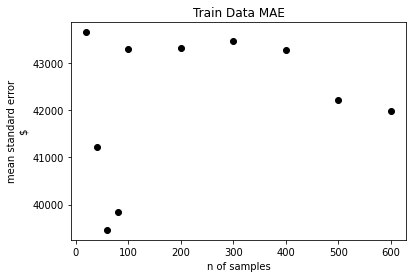

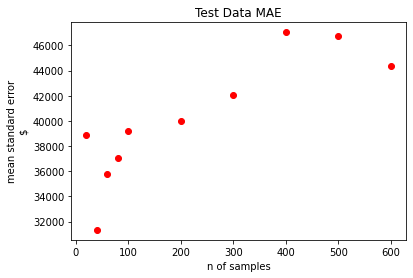

In [136]:
plt.scatter(n_samples, trainData_MAEs, c='k')
plt.title("Train Data MAE")
plt.xlabel("n of samples")
plt.ylabel("mean standard error\n$")
plt.show()

print()

plt.scatter(n_samples, testData_MAEs, c='r')
plt.title("Test Data MAE")
plt.xlabel("n of samples")
plt.ylabel("mean standard error\n$")
plt.show()